In [1]:
import csv
from enum import Enum
import sys
import matplotlib.pyplot as plt

output = {}
csv.field_size_limit(sys.maxsize)

class zones(Enum):
    OBJECTID   = 0
    Shape_Leng = 1
    the_geom   = 2
    Shape_Area = 3
    zone       = 4
    LocationID = 5
    borough    = 6

min_x = -50
max_x = -100
min_y = 70
max_y = 0

with open("./taxi_zones.csv", 'r') as file:
    csvreader = csv.reader(file)
    row_count = 0
    for row in csvreader:
        if row_count == 0:
            row_count += 1
            continue
        x = 0
        y = 0
        tmp = row[zones.the_geom.value][16:-3].split(", ")
        size = len(tmp)
        for i in tmp:
            t = i.split(" ")
            try:
                x += float(t[0])
                y += float(t[1])
            except:
                x += float(t[0][2:])
                y += float(t[1][:-2])
        res = [x / size]
        res.append(y /size)
        if res[0] < min_x:
            min_x=res[0]
        elif res[0] > max_x:
            max_x=res[0]
        elif res[1] < min_y:
            min_y=res[1]
        elif res[1] > max_y:
            max_y=res[1]
        output[int(row[zones.OBJECTID.value])]=res

In [2]:
output[1]

[-74.174270275862, 40.69024330172404]

In [3]:
x_diff = max_x - min_x
y_diff = max_y - min_y

y_var = (max_y - min_y)/2
y_lower = (max_x - min_x)/2 - y_var

In [4]:
sorted_output_key = sorted(output)
sorted_output     = {}
for i in sorted_output_key:
    temp = [(output[i][0]-min_x) / x_diff * 100]
    temp.append(((output[i][1]-min_y) + y_lower) / x_diff * 100)
    sorted_output[i] = temp

In [5]:
with open('coordinates.csv', 'w', newline='') as file:
    writer = csv.writer(file)
     
    writer.writerow(["ObjectID", "X", "Y"])
    for key in sorted_output.keys():
        writer.writerow([key, sorted_output[key][0], sorted_output[key][1]])

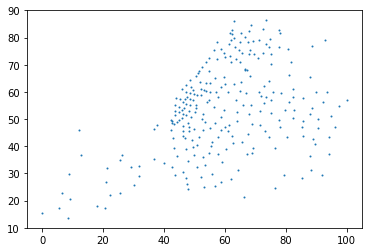

In [6]:
x_crds = []
y_crds = []
for loc in sorted_output:
    x_crds.append(sorted_output[loc][0])
    y_crds.append(sorted_output[loc][1])
plt.scatter(x_crds, y_crds, s=1)
plt.show()